###### The latest version of this IPython notebook is available at [http://github.com/jckantor](http://github.com/jckantor)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

Jeffrey C. Kantor (Kantor.1@nd.edu)

# Antoine Database

The purpose of this notebook is to demonstrate the use Antoine's equation for routine chemical calcualtions. The notebook uses Google Sheets as a data repository of coefficients for Antoine parameters for a selected set of chemical species.

#### Table of Contents

* [Introduction](#Introduction-to-Antoine's-Equation)
* [Plotting Saturation Pressure](#Plotting-Saturation-Pressure)

#### How to Run this Notebook

You can open run this notebook directly by clicking on 

[![Binder](http://mybinder.org/badge.svg)](http://mybinder.org/repo/jckantor/Antoine-Database)

then selecting `Run All` under the Jupyter `Cell` menu. Alternatively, if you have access to a Jupyter development environment (such as [Anaconda](https://www.continuum.io/downloads)), you can download this notebook using `Download as ...` under the Jupyter `File` menu, or fork the entire project from the [github repository](https://github.com/jckantor/Antoine-Database).

## Introduction to Antoine's Equation

Antoine's equation is used to estimate the pressure of the vapor phase of a pure component in equilibrium its pure liquid phase as a function of temperature. The form of the equation is

$$\log_{10} P^{sat}(T) = A - \frac{B}{T+C}$$

where $A$, $B$, and $C$ are constants specific to the species of interest. A data set of coefficients been prepared as a [Google Sheet](https://docs.google.com/spreadsheets/d/1lqIWdnmjiZX2LwHZ_5TdPXDOEn8hp-ZkdONlbjA-P1k/edit?usp=sharing) and read in the notebook by running the following cell.

In [11]:
import requests
from StringIO import StringIO
import pandas as pd

r = requests.get('https://docs.google.com/spreadsheets/d/1lqIWdnmjiZX2LwHZ_5TdPXDOEn8hp-ZkdONlbjA-P1k/export?format=csv&id')
csv = pd.io.parsers.read_csv(StringIO(r.content))

idx = pd.MultiIndex.from_tuples(zip(csv['Species'].str.lower(),csv['Tmin'],csv['Tmax']),
                         names=['Species','Tmin','Tmax'])

adb = pd.DataFrame(index = idx)
adb['A'] = pd.Series(list(csv['A']),index = idx)
adb['B'] = pd.Series(list(csv['B']),index = idx)
adb['C'] = pd.Series(list(csv['C']),index = idx)

adb

A         B        C
Species      Tmin  Tmax                            
acetaldehyde -45.0 70    8.00550  1600.000  291.800
acetic acid   16.7 320   7.38782  1533.313  222.309
benzene       8.0  103   6.90565  1211.033  220.790
toluene       6.0  137   6.95464  1344.800  218.480
water         0.0  60    8.10765  1750.286  235.000
              60.0 150   7.96681  1668.210  228.000

## Plotting Saturation Pressure

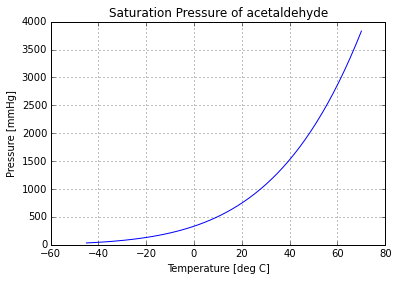

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def Psat(species,T):
    if isinstance(T,np.ndarray):
        return np.ndarray([Psat(species,t) for t in T])
    for Tmin,Tmax in adb.ix[species.lower()].index:
        A = adb.ix[species,Tmin,Tmax]['A']
        B = adb.ix[species,Tmin,Tmax]['B']
        C = adb.ix[species,Tmin,Tmax]['C']
        f = lambda T: 10.0**(A - B/(T + C) )
        T = np.linspace(Tmin,Tmax)
        plt.plot(T,f(T),'b')

def PsatPlot(species):
    for Tmin,Tmax in adb.ix[species].index:
        A = adb.ix[species,Tmin,Tmax]['A']
        B = adb.ix[species,Tmin,Tmax]['B']
        C = adb.ix[species,Tmin,Tmax]['C']
        f = lambda T: 10.0**(A - B/(T + C) )
        T = np.linspace(Tmin,Tmax)
        plt.plot(T,f(T),'b')
    plt.xlabel('Temperature [deg C]')
    plt.ylabel('Pressure [mmHg]')
    plt.title('Saturation Pressure of ' + species)
    plt.grid();

import ipywidgets as widgets
from IPython.display import display

widgets.interact(PsatPlot, species=list(adb.index.levels[0]));

## Raoult's Law

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('-XcTEknC9Aw') 